In [1]:
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression as LRN
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as LinReg
from sklearn.metrics import mean_absolute_error as mae

### Reading DataSet 

In [2]:
data1 = pd.read_csv('data1.csv')
print(data1.shape)
data1.head()

(1000, 8)


,Unnamed: 0,id,title,ingredients,directions,link,source,item
0,0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc..."
1,1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ..."
2,2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""..."
3,3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin..."
4,4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b..."


In [3]:
data1.rename(columns={data1.columns[0]: 'drop'}, inplace=True)
data1.head()

,drop,id,title,ingredients,directions,link,source,item
0,0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc..."
1,1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ..."
2,2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""..."
3,3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin..."
4,4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b..."


In [4]:
data1 = data1.drop(columns=['drop'])
data1.head()

,id,title,ingredients,directions,link,source,item
0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc..."
1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ..."
2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""..."
3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin..."
4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b..."


In [5]:
data2 = pd.read_csv('data2.csv')
print(data2.shape)
data2.head()

(1000, 45)


,Unnamed: 0,item,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
0,0,"['pinto beans', 'cooking oil', 'catsup', 'worc...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"['carrots', 'eggs', 'grated cheese', 'cracker ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"['chicken', 'cream of chicken', 'margarine', '...",0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,"['pineapple', 'sugar', 'lemon flavored gelatin...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"['elbow macaroni', 'grated cheese', 'eggs', 'b...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data2.rename(columns={data2.columns[0]: 'drop'}, inplace=True)
data2 = data2.drop(columns=['drop', 'item'])
print(data2.shape)
data2.head()

(1000, 43)


,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data2.isna().sum()

apples         1
beans          1
beef           1
bread          1
butter         1
cereal         1
cheese         1
chicken        1
chocolate      1
coconut        1
corn           1
crackers       1
eggs           1
flour          1
fruit          1
lemon          1
milk           1
nuts           1
oranges        1
pasta          1
peas           1
pepper         1
pork           1
potato         1
sauce          1
sugar          1
vegetables     1
seasonings     1
fruits         1
condiment      1
liquid         1
cake_mix       1
soup           1
oil_vinegar    1
fish           1
alcohol        1
chili          1
bell_pepper    1
pie_cookies    1
chips          1
whipped        1
cream          1
rice_noodle    1
dtype: int64

In [8]:
data2['apples'].value_counts(dropna=False)

0.0    955
1.0     40
2.0      4
NaN      1
Name: apples, dtype: int64

In [9]:
data2[data2.isnull().any(1)]

/var/folders/g1/6jtlrdq10tl135qr36s2z_vh0000gn/T/ipykernel_2966/4187755893.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data2[data2.isnull().any(1)]


,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data2 = data2.dropna()

In [11]:
data2.isna().sum()

apples         0
beans          0
beef           0
bread          0
butter         0
cereal         0
cheese         0
chicken        0
chocolate      0
coconut        0
corn           0
crackers       0
eggs           0
flour          0
fruit          0
lemon          0
milk           0
nuts           0
oranges        0
pasta          0
peas           0
pepper         0
pork           0
potato         0
sauce          0
sugar          0
vegetables     0
seasonings     0
fruits         0
condiment      0
liquid         0
cake_mix       0
soup           0
oil_vinegar    0
fish           0
alcohol        0
chili          0
bell_pepper    0
pie_cookies    0
chips          0
whipped        0
cream          0
rice_noodle    0
dtype: int64

In [12]:
row_548 = data1.loc[548]
print(row_548)

id                                                        2547
title                            Peek-A-Boo Cake(Bingo Cake)  
ingredients             ["1 box Duncan Hines yellow cake mix"]
directions                  ["Follow recipe on box for cake."]
link           www.cookbooks.com/Recipe-Details.aspx?id=789999
source                                                Gathered
item                                                        []
Name: 548, dtype: object


In [13]:
data1.drop(data1.loc[548].name, inplace=True)

In [14]:
data1.isna().sum()

id             0
title          0
ingredients    0
directions     0
link           0
source         0
item           0
dtype: int64

### Scaling the Numerical

In [15]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(data2)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=data2.columns).head()

,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
0,-0.207251,3.253564,-0.39868,-0.24369,-0.697890,-0.119219,-0.578763,-0.252566,-0.314126,-0.155265,-0.188578,-0.241377,-0.731057,0.692215,-0.031654,-0.307752,-0.546536,-0.522620,-0.202324,-0.188791,-0.183083,-0.438056,-0.184828,-0.272385,3.003853,0.714286,-0.532216,-0.790273,-0.406842,-0.932121,1.663361,-0.239649,-0.287404,1.766241,-0.190833,-0.190544,-0.207733,-0.24655,-0.13924,-0.139985,-0.170202,-0.184828,-0.213636
1,-0.207251,-0.157045,-0.39868,-0.24369,-0.697890,-0.119219,0.958961,-0.252566,-0.314126,-0.155265,-0.188578,4.142902,1.221687,-0.612545,-0.031654,-0.307752,-0.546536,-0.522620,-0.202324,-0.188791,-0.183083,-0.438056,-0.184828,-0.272385,-0.437488,-0.871429,0.681674,-0.790273,-0.406842,0.541279,1.663361,-0.239649,2.642354,-0.439352,-0.190833,-0.190544,-0.207733,-0.24655,-0.13924,-0.139985,-0.170202,-0.184828,-0.213636
2,-0.207251,-0.157045,-0.39868,-0.24369,2.981225,-0.119219,-0.578763,2.787351,-0.314126,-0.155265,-0.188578,-0.241377,-0.731057,0.692215,-0.031654,-0.307752,-0.546536,-0.522620,-0.202324,-0.188791,-0.183083,-0.438056,-0.184828,-0.272385,-0.437488,-0.871429,-0.532216,0.370731,-0.406842,-0.932121,-0.469755,-0.239649,-0.287404,-0.439352,-0.190833,-0.190544,-0.207733,-0.24655,-0.13924,-0.139985,-0.170202,5.410428,-0.213636
3,4.106162,-0.157045,-0.39868,-0.24369,-0.697890,-0.119219,0.958961,-0.252566,-0.314126,-0.155265,-0.188578,-0.241377,-0.731057,-0.612545,-0.031654,2.592668,-0.546536,1.643761,-0.202324,-0.188791,-0.183083,-0.438056,-0.184828,-0.272385,-0.437488,0.714286,1.895564,-0.790273,1.286637,-0.932121,-0.469755,-0.239649,-0.287404,-0.439352,-0.190833,-0.190544,-0.207733,-0.24655,-0.13924,-0.139985,-0.170202,-0.184828,-0.213636
4,-0.207251,-0.157045,-0.39868,-0.24369,1.141667,-0.119219,0.958961,-0.252566,-0.314126,-0.155265,-0.188578,-0.241377,1.221687,-0.612545,-0.031654,-0.307752,1.594600,-0.522620,-0.202324,4.774422,-0.183083,-0.438056,-0.184828,-0.272385,-0.437488,-0.871429,-0.532216,-0.790273,-0.406842,-0.932121,-0.469755,-0.239649,-0.287404,-0.439352,-0.190833,-0.190544,-0.207733,-0.24655,-0.13924,-0.139985,-0.170202,-0.184828,-0.213636


### Clustering Model 

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1234)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

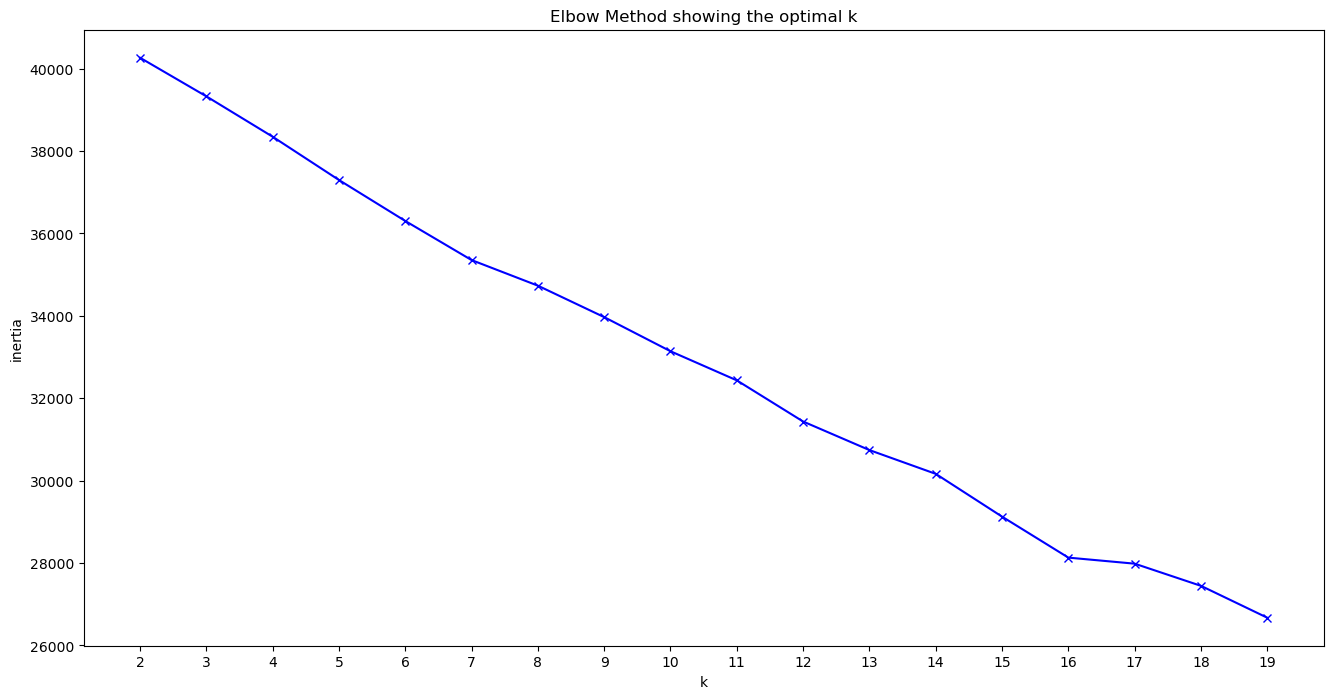

In [17]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,n_init="auto",
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

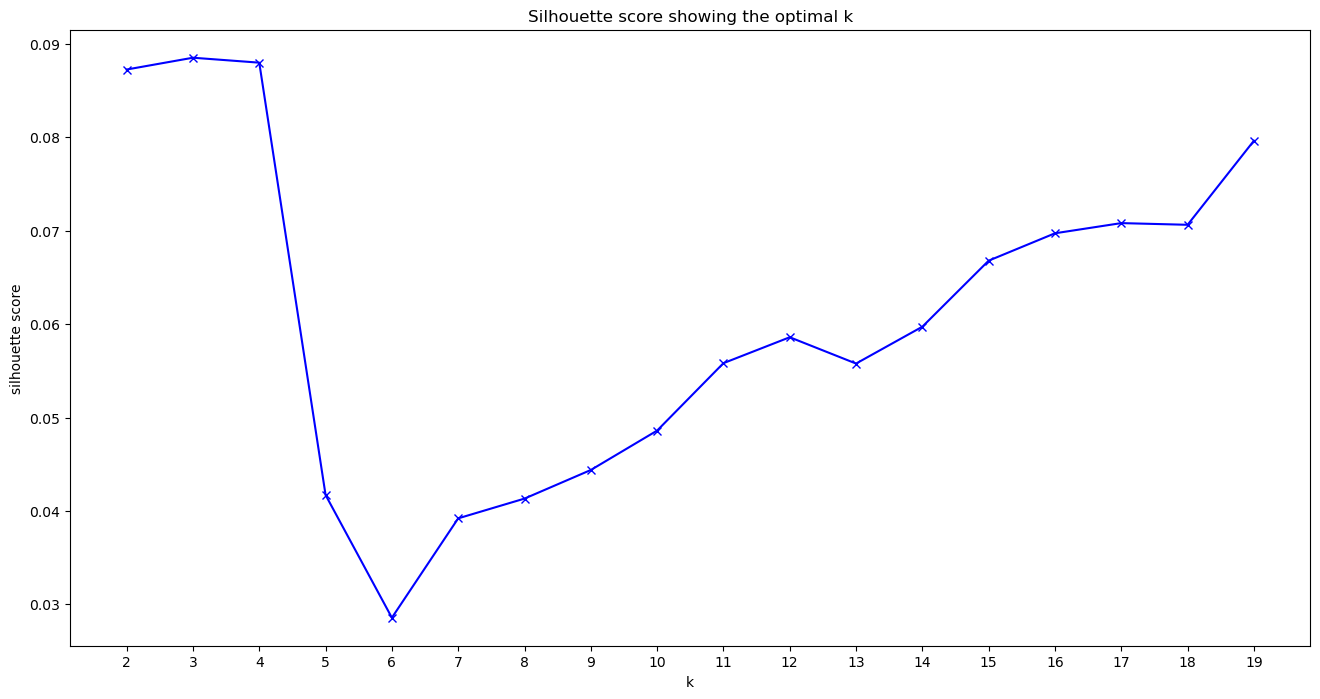

In [18]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [19]:
print('KMeans = ', kmeans.inertia_)

KMeans =  26672.114658964405


In [20]:
kmeans = KMeans(n_clusters=13, random_state=1234).fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0      34
1     214
2      21
3     221
4      35
5      45
6      74
7      42
8     125
9      28
10     45
11     14
12    101
dtype: int64

### Data Merge with cluster

In [21]:
print(data1.shape)
data1.head()

(999, 7)


,id,title,ingredients,directions,link,source,item
0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc..."
1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ..."
2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""..."
3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin..."
4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b..."


In [22]:
print(data2.shape)
data2.head()

(999, 43)


,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
recipe = pd.concat([data1,data2],axis=1)
print(recipe.shape)
recipe.head()

(999, 50)


,id,title,ingredients,directions,link,source,item,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle
0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""...",0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
recipe["cluster"] = clusters
recipe.head()

,id,title,ingredients,directions,link,source,item,apples,beans,beef,bread,butter,cereal,cheese,chicken,chocolate,coconut,corn,crackers,eggs,flour,fruit,lemon,milk,nuts,oranges,pasta,peas,pepper,pork,potato,sauce,sugar,vegetables,seasonings,fruits,condiment,liquid,cake_mix,soup,oil_vinegar,fish,alcohol,chili,bell_pepper,pie_cookies,chips,whipped,cream,rice_noodle,cluster
0,1999,Swedish Baked Beans,"[""2 lb. dry pinto beans"", ""1/2 c. cooking oil""...","[""Cook pinto beans for 2 1/2 hours, then drain...",www.cookbooks.com/Recipe-Details.aspx?id=710520,Gathered,"[""pinto beans"", ""cooking oil"", ""catsup"", ""Worc...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,2000,Carrot Casserole,"[""2 c. grated raw carrots"", ""2 eggs, beaten"", ...","[""Mix together well."", ""Bake in buttered casse...",www.cookbooks.com/Recipe-Details.aspx?id=982285,Gathered,"[""carrots"", ""eggs"", ""grated cheese"", ""cracker ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2001,Melt In Your Mouth Chicken Casserole,"[""2 1/2 to 3 lb. chicken, cooked and deboned (...","[""Preheat oven to 425\u00b0."", ""In oblong baki...",www.cookbooks.com/Recipe-Details.aspx?id=493659,Gathered,"[""chicken"", ""cream of chicken"", ""margarine"", ""...",0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
3,2002,Autumn Apple Salad,"[""1 (20 oz.) can crushed pineapple (undrained)...","[""In a saucepan, combine pineapple and sugar; ...",www.cookbooks.com/Recipe-Details.aspx?id=596076,Gathered,"[""pineapple"", ""sugar"", ""lemon flavored gelatin...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,2003,Macaroni And Cheese,"[""1 (8 oz.) box elbow macaroni"", ""3 c. grated ...","[""Cook macaroni until done; drain. Grate chees...",www.cookbooks.com/Recipe-Details.aspx?id=9087,Gathered,"[""elbow macaroni"", ""grated cheese"", ""eggs"", ""b...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [25]:
recipe.to_csv('data3.csv')

### Recomander app

In [26]:
# Function to recommend a recipe based on a given ingredient
def recommend_recipe_with_ingredient(df, ingredient):
    # Check if the ingredient is in the "item" column
    mask = recipe['item'].apply(lambda x: ingredient in x)

    if mask.any():
        # Filter recipes containing the ingredient
        recipes_with_ingredient = recipe[mask]
        
        # Randomly select one recipe from the filtered recipes
        recommended_recipe = recipes_with_ingredient.sample(1)[['title', 'ingredients', 'directions', 'cluster']]
        
        return recommended_recipe
    else:
        return "No recipes found with the ingredient: " + ingredient


# Example: User input for the ingredient
ingredient = input("Enter an ingredient: ")

# Example: Recommend one recipe containing the input ingredient
recommended_recipe = recommend_recipe_with_ingredient(recipe, ingredient)
print("Recommended recipe containing", ingredient + ":")
print(recommended_recipe)

Enter an ingredient: chicken
Recommended recipe containing chicken:
               title                                        ingredients  \
938  Easy Onion Soup  ["3 large onions, sliced thin", "1/4 c. butter...   

                                            directions  cluster  
938  ["Saute onion in butter.", "Add water, broths ...        1  


In [27]:
#pip install google-api-python-client

In [35]:
from googleapiclient.discovery import build

# Function to recommend a recipe based on a given ingredient
def recommend_recipe_with_ingredient(df, ingredient):
    # Check if the ingredient is in the "item" column
    mask = recipe['item'].apply(lambda x: ingredient in x)

    if mask.any():
        # Filter recipes containing the ingredient
        recipes_with_ingredient = recipe[mask]
        
        # Randomly select one recipe from the filtered recipes
        recommended_recipe = recipes_with_ingredient.sample(1)[['title', 'ingredients', 'directions', 'cluster']]
        
        return recommended_recipe
    else:
        return None

# Function to search for YouTube videos with a specific title
def search_youtube_video(title, api_key):
    # Initialize the YouTube Data API client
    youtube = build('youtube', 'v3', developerKey=api_key)
    
    # Search for videos with the recipe title
    search_response = youtube.search().list(
        q=title,
        part='id',
        maxResults=1,
        type='video'
    ).execute()
    
    # Extract video ID from the search results
    video_id = search_response['items'][0]['id']['videoId']
    
    # Construct video link
    video_link = 'https://www.youtube.com/watch?v=' + video_id
    
    return video_link


# User input for the ingredient
ingredient = input("Enter an ingredient: ")

# Recommend one recipe containing the input ingredient
recommended_recipe = recommend_recipe_with_ingredient(recipe, ingredient)
if recommended_recipe is not None:
    print("Recommended recipe containing", ingredient + ":")
    print(recommended_recipe)
    
    # Read YouTube API Key from file
    with open("youtube.txt", "r") as file:
        api_key = file.readline().split(':')[1].strip()
    
    # Search for YouTube video with the recipe title
    video_link = search_youtube_video(recommended_recipe['title'].iloc[0], api_key)
    print("Video link for the recipe:", video_link)
else:
    print("No recipes found with the ingredient:", ingredient)

Enter an ingredient: spinach
Recommended recipe containing spinach:
                               title  \
995  Crepes With Ricotta And Spinach   

                                           ingredients  \
995  ["12 crepes (store bought or homemade)", "1 1/...   

                                            directions  cluster  
995  ["Mix together the crumbled Ricotta, spinach a...        1  
Video link for the recipe: https://www.youtube.com/watch?v=w5Fzd_1y8nA
